#Bankruptcy prediction
Bankruptcy refers to the legal status of a company that is unable to repay its debts to creditors. It signifies a severe financial crisis where the company's liabilities outweigh its assets, rendering it incapable of continuing its normal business operations. Bankruptcy can have a cascading effect, impacting employees, investors, creditors, and the overall economy.
In this project, the goal is to develop a predictive model that can accurately identify the likelihood of a company going bankrupt based on historical financial and non-financial data.




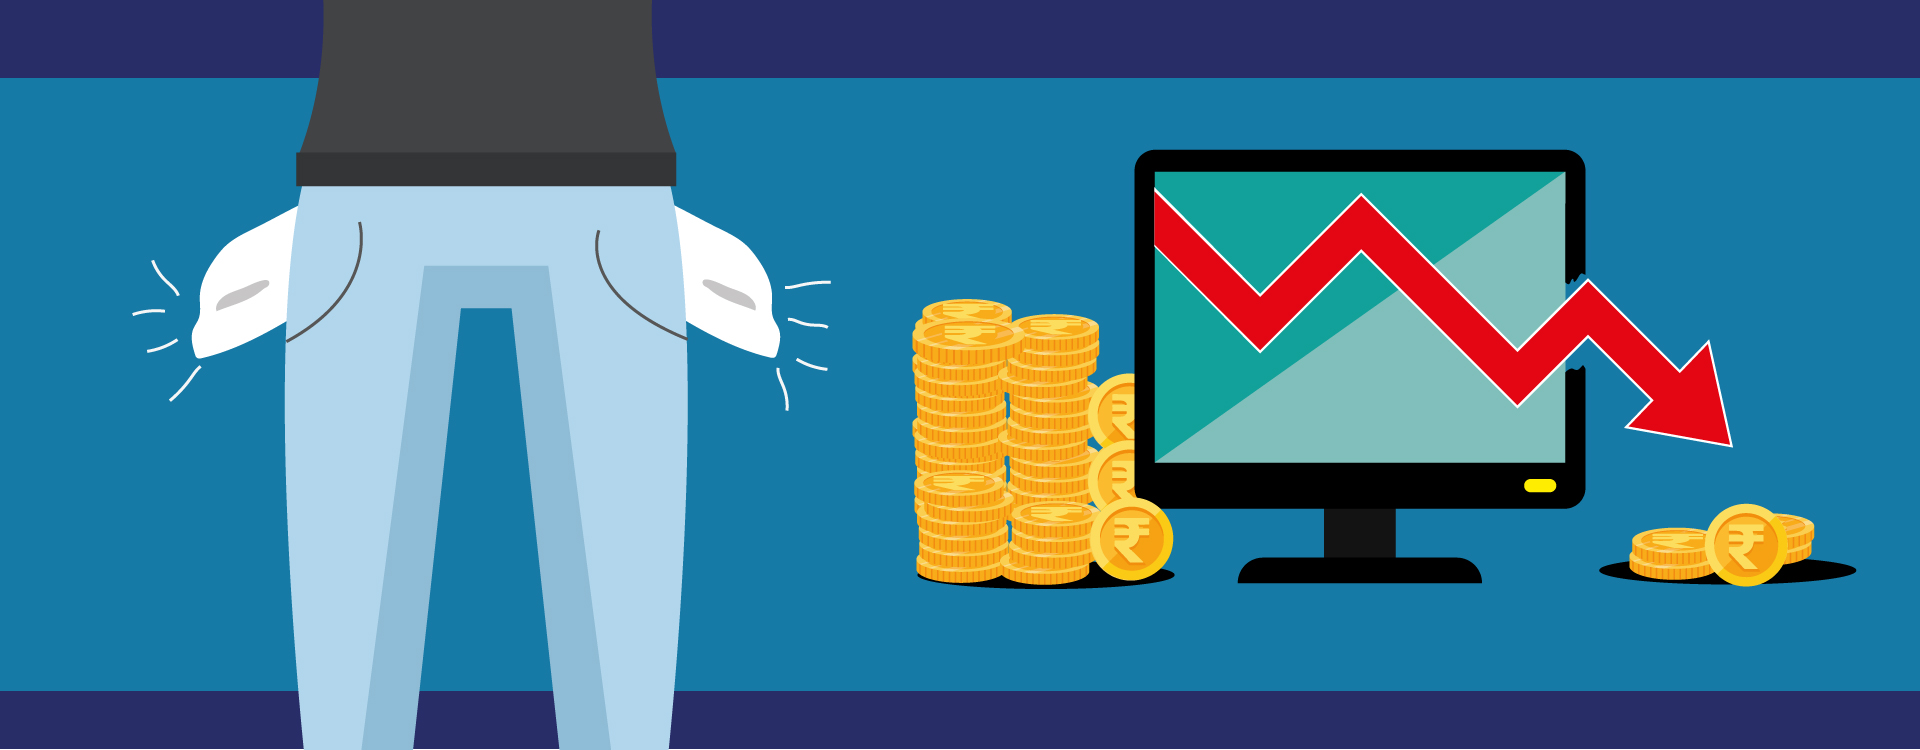

#Import, Libraries & Load the dataset

In [51]:
import gzip
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from imblearn.over_sampling import RandomOverSampler
from IPython.display import VimeoVideo
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [3]:
df= pd.read_csv("/content/drive/MyDrive/bankruptcy_data.csv")
print(df.shape)
df.head()

(9792, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,False
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,False
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,False
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,False
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,False


#Explore

I will use info method to explore df. What type of features does this dataset have? Which column is the target? Are there columns will missing values that we'll need to address?

In [4]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Attr1     9791 non-null   float64
 1   Attr2     9791 non-null   float64
 2   Attr3     9791 non-null   float64
 3   Attr4     9749 non-null   float64
 4   Attr5     9771 non-null   float64
 5   Attr6     9791 non-null   float64
 6   Attr7     9791 non-null   float64
 7   Attr8     9773 non-null   float64
 8   Attr9     9792 non-null   float64
 9   Attr10    9791 non-null   float64
 10  Attr11    9791 non-null   float64
 11  Attr12    9749 non-null   float64
 12  Attr13    9771 non-null   float64
 13  Attr14    9791 non-null   float64
 14  Attr15    9784 non-null   float64
 15  Attr16    9773 non-null   float64
 16  Attr17    9773 non-null   float64
 17  Attr18    9791 non-null   float64
 18  Attr19    9771 non-null   float64
 19  Attr20    9771 non-null   float64
 20  Attr21    9634 non-null   floa

In [5]:
print ("Number of Rows     : " ,df.shape[0])
print ("Number of Columns  : " ,df.shape[1])
print ("="*100,"\nFeatures : \n" ,df.columns.tolist())
print ("="*100,"\nMissing values :  ",df.isnull().sum().values.sum())
print ("="*100,"\nduplicate values :  \n",df.duplicated().sum())

Number of Rows     :  9792
Number of Columns  :  65
Features : 
 ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'bankrupt']
Missing values :   8776
duplicate values :  
 82


I  know  now that all the features consist of numerical values, and it's evident that there are instances of missing data as well as duplicated values.

# Data Visualization

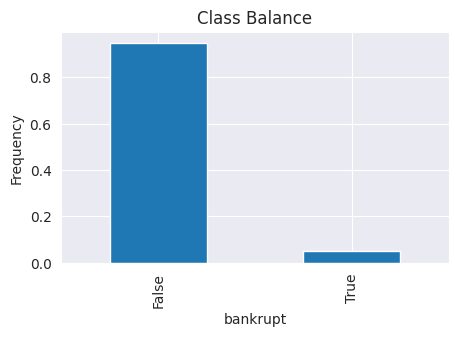

In [6]:
# Plot class balance
plt.figure(figsize=(5, 3))
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar", xlabel="bankrupt",ylabel="Frequency",title="Class Balance"
);

That's certainly a positive development for the Polish economy! With the majority of companies in our dataset demonstrating favorable performance, let's delve into more specific details. Nonetheless, this also highlights the presence of an imbalanced dataset, where the proportion of the dominant class significantly surpasses that of the minority class.

 It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values in "Attr27" are distributed.

I will also Explore Attribute 27 (profit on operating activities / financial expenses)

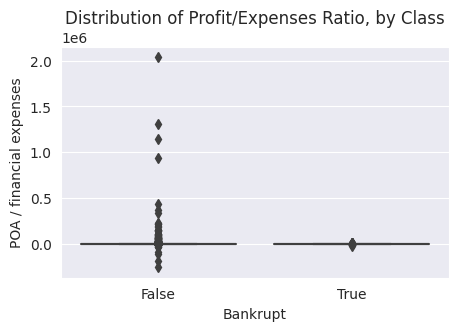

In [38]:
# Create boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x="bankrupt",y="Attr27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Generally, if a company is spending more than it's taken in that might be an indicator for future bankruptcy. and companies that make a lot of profits are probably not going to go bankrupt.

Why does this look so funny?  boxplots exist to help us see the quartiles in a dataset, and this one doesn't really do that. Let's check the distribution of "Attr27"to see if we can figure out what's going on here.

In [8]:
# Summary statistics for `Attr27`
df["Attr27"].describe().apply("{0:.0f}".format)

count       9151
mean        1116
std        31439
min      -259010
25%            0
50%            1
75%            5
max      2037300
Name: Attr27, dtype: object

Hmmm. Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

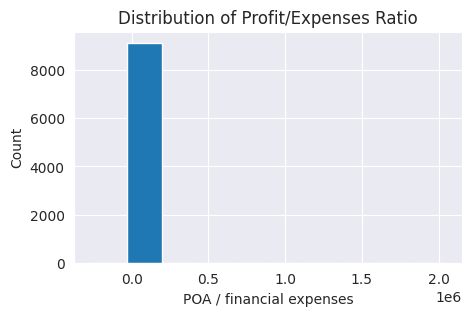

In [39]:
# Plot histogram of `Attr27`
plt.figure(figsize=(5, 3))
plt.hist(df["Attr27"])
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Aha! I saw it in the numbers and now I see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, I need to trim the data.

In [10]:
#Trim the data
q1,q9=df["Attr27"].quantile([0.1,0.9])
mask= df["Attr27"].between(q1,q9)
mask.head()

0     True
1    False
2     True
3     True
4     True
Name: Attr27, dtype: bool

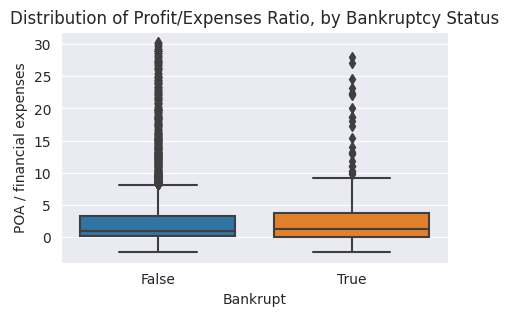

In [40]:
# Create clipped boxplot
plt.figure(figsize=(5, 3))
q1,q9=df["Attr27"].quantile([0.1,0.9])
mask= df["Attr27"].between(q1,q9)
sns.boxplot(x="bankrupt",y="Attr27",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

That makes a lot more sense. Let's take a look at some of the other features in the dataset to see what else is out there

I will also Explore Attribute 39 :  profit on sales / sales

Profit on sales, also known as profit margin or profitability ratio, is a financial metric used to evaluate the profitability of a company's operations. It provides insight into how efficiently a company is generating profits from its sales revenue.

The formula for calculating profit on sales is:

Profit on Sales=
(Net Profit /Net Sales)× 100
Where:

* Net Profit is the total profit earned by the company after deducting all expenses, taxes, and interest from the total revenue.

* Net Sales refers to the total revenue generated from the sales of goods or services. It excludes returns, allowances, and discounts

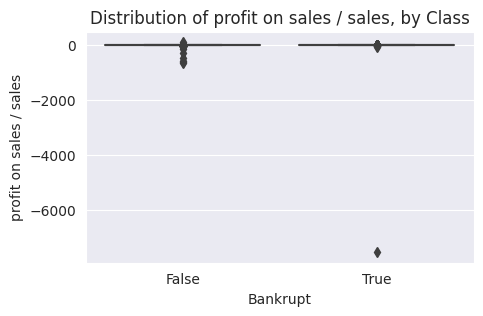

In [41]:
# Explore another feature
# Create boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x="bankrupt",y="Attr39",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("profit on sales / sales")
plt.title("Distribution of profit on sales / sales, by Class");

In [13]:
# Summary statistics for `Attr39`
df["Attr39"].describe().apply("{0:.0f}".format)

count     9771
mean        -1
std         77
min      -7522
25%          0
50%          0
75%          0
max        112
Name: Attr39, dtype: object

In [14]:
# Summary statistics for `Attr39`
df["Attr39"].describe().apply("{0:.0f}".format)

count     9771
mean        -1
std         77
min      -7522
25%          0
50%          0
75%          0
max        112
Name: Attr39, dtype: object

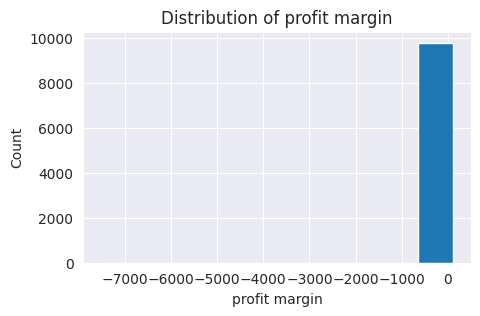

In [42]:
# Plot histogram of `Attr39`
plt.figure(figsize=(5, 3))
plt.hist(df["Attr39"])
plt.xlabel("profit margin")
plt.ylabel("Count"),
plt.title("Distribution of profit margin");

In [16]:
# Trim feature39
q1,q9=df["Attr39"].quantile([0.1,0.9])
mask= df["Attr39"].between(q1,q9)
mask.head()

0     True
1    False
2     True
3     True
4     True
Name: Attr39, dtype: bool

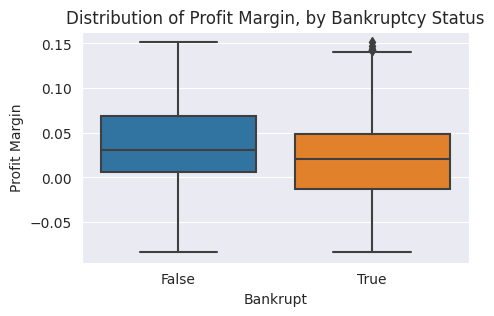

In [43]:
# Create clipped boxplot
plt.figure(figsize=(5, 3))
q1,q9=df["Attr39"].quantile([0.1,0.9])
mask= df["Attr39"].between(q1,q9)
sns.boxplot(x="bankrupt",y="Attr39",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Profit Margin")
plt.title("Distribution of Profit Margin, by Bankruptcy Status");

Looking at other features, I can see that they're skewed, too. This will be important to keep in mind when I decide what type of model I want to use.

Another important consideration for model selection is whether there are any issues with multicollinearity in the model. Let's check.

<Axes: >

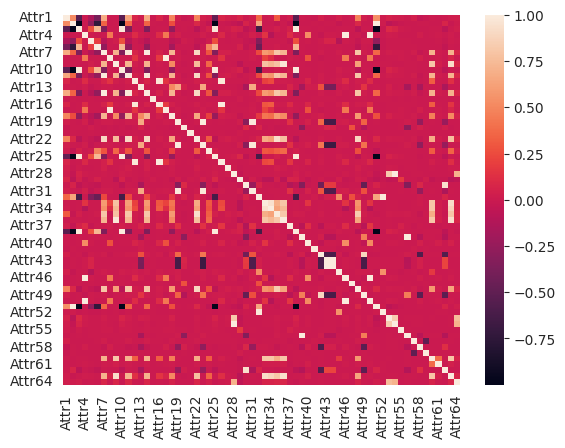

In [45]:
# Calculate the correlation matrix by excluding the "bankrupt" column
corr = df.drop(columns="bankrupt").corr()

# Create a heatmap using Seaborn to visualize the correlation matrix
sns.heatmap(corr)

###Insights from EDA:


*   Imbalanced Data: The dataset showcases an imbalanced class distribution, requiring attention during data preparation.
*   Missing Values: A significant number of features contain missing values, necessitating imputation strategies.


*   Skewed Features: Many features exhibit skewed distributions, favoring the use of the median for imputation instead of the mean.
*   Autocorrelation Concerns: The presence of autocorrelation suggests avoiding linear models; instead, opting for tree-based models is recommended as a more suitable approach.


# Split

In [19]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9792, 64)
y shape: (9792,)


In [20]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7833, 64)
y_train shape: (7833,)
X_test shape: (1959, 64)
y_test shape: (1959,)


In [21]:
## make the dataset more balanced
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (14842, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.069548,0.69574,0.055553,1.0897,-27.2160,-0.264400,0.069113,0.36634,1.0355,0.25488,...,580.85,0.034314,0.272870,0.96569,0.30020,10.9890,6.4865,85.355,4.2762,8.1421
1,-0.084151,0.62034,0.114540,1.2505,-5.9921,0.000000,-0.084151,0.61202,1.6597,0.37966,...,557.14,-0.121260,-0.221650,1.04600,0.00000,11.5100,7.3495,100.560,3.6295,3.8759
2,0.081425,0.10163,0.424230,5.1741,124.5500,0.297150,0.101460,8.52550,1.1220,0.86647,...,18200.00,0.108710,0.093974,0.89129,0.00000,5.5087,3.9838,41.429,8.8102,1.8885
3,0.011690,0.80729,-0.216890,0.6474,-124.9500,-0.037361,0.011781,0.23871,1.0410,0.19271,...,-3420.70,0.039353,0.060664,0.96065,0.99729,17.1860,2.5425,259.880,1.4045,1.4356
4,0.000917,0.33013,0.591420,2.8261,-30.7370,0.000000,0.000917,2.02910,1.4833,0.66987,...,3355.10,0.270390,0.001369,0.73336,0.00000,2.2321,6.9965,79.698,4.5798,17.5120


#Modeling

##Baseline

In [22]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9474


## Random Forest

In [23]:
clf = make_pipeline(SimpleImputer(),RandomForestClassifier(random_state=42))

print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Tune The hyperparameters

In [24]:
params = {
     "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [25]:
# Grid search
model = GridSearchCV(
clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [26]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

120 fits means
4 different max_depths times 3 n_estimators times 2 imputation strategies... that makes 24 forests. How many fits did we just do? 24 forests times 5 folds is 120. And each forest is comprised of 25-75 trees, which works out to at least 3,000 trees.

In [27]:
# Extract the cross-validation results from model and load them into a DataFrame named cv_results.
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.723436,0.035392,0.021843,0.001585,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978444,0.975749,0.980458,0.976415,0.974057,0.977025,0.002219,21
1,2.767251,0.776655,0.034308,0.010178,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.975076,0.972044,0.978437,0.978100,0.974730,0.975677,0.002364,24
2,3.535204,0.495100,0.040126,0.011126,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.977770,0.977097,0.979784,0.980458,0.974730,0.977968,0.002039,20
3,4.129041,0.679094,0.041275,0.011877,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978781,0.970697,0.978437,0.977763,0.975404,0.976216,0.003001,23
4,5.931837,0.585546,0.068733,0.022742,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979454,0.978444,0.982480,0.979784,0.975067,0.979046,0.002396,19
5,7.046157,1.028881,0.048292,0.001195,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978781,0.969687,0.979447,0.978437,0.976752,0.976621,0.003579,22
6,2.901066,0.624764,0.031339,0.009914,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997642,0.992590,0.995283,0.995957,0.995620,0.995418,0.001631,15
7,2.045663,0.017759,0.023310,0.000408,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.993601,0.994274,0.992588,0.994609,0.992588,0.993532,0.000837,18
8,4.732494,0.877433,0.054227,0.019321,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997642,0.992590,0.995283,0.996968,0.995957,0.995688,0.001749,13
9,4.887257,1.047805,0.049453,0.020577,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994611,0.992590,0.992588,0.995957,0.993598,0.993869,0.001285,17


 let's see how long it took each model to train.

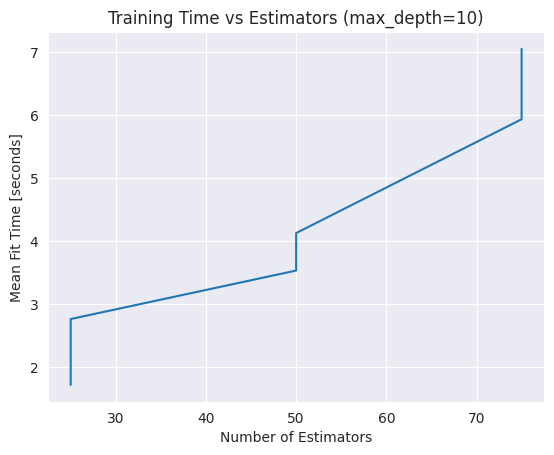

In [28]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(
cv_results[mask]["param_randomforestclassifier__n_estimators"],
cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

There is a very clear relationship between number of estiamtors and the mean training time so the more estimators I add to the model the longer it takes to fit.

Notice for each number of estimators there are two mean training times. one of these points represents the model being trained using the mean imputation strategy and the other one represents the median imputation strategy. So I will look more closely at this difference between mean and median and its relationship with the training.

Next, I'll look at max_depth

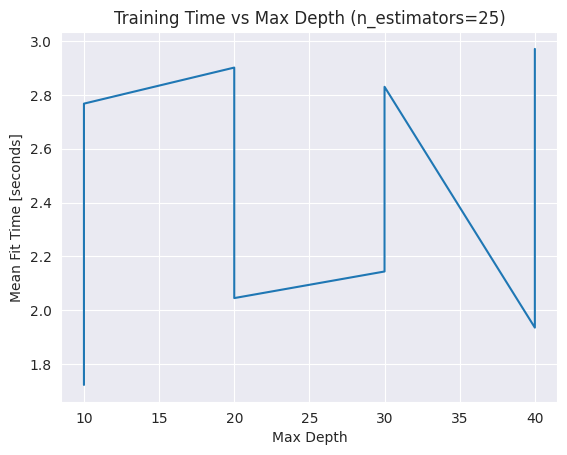

In [30]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(
cv_results[mask]["param_randomforestclassifier__max_depth"],
cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [33]:
cv_results[mask][["mean_fit_time","param_randomforestclassifier__max_depth","param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,1.723436,10,mean
1,2.767251,10,median
6,2.901066,20,mean
7,2.045663,20,median
12,2.144378,30,mean
13,2.829696,30,median
18,1.936041,40,mean
19,2.970289,40,median


There's a general upwards trend, but I see a lot of up-and-down here. That's because for each max depth, grid search tries two different imputation strategies: mean and median. Mean is a lot faster to calculate, so that speeds up training time. The median is the best imputation strategy in terms of model performance maybe not in terms of training time.

Finally, I'll look at the hyperparameters that led to the best performance.

In [32]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [35]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

### Evaluate

Calculate the training and test accuracy scores for model

In [36]:
acc_train = model.score(X_train_over,y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9546


 Confusion matrix


<Figure size 500x300 with 0 Axes>

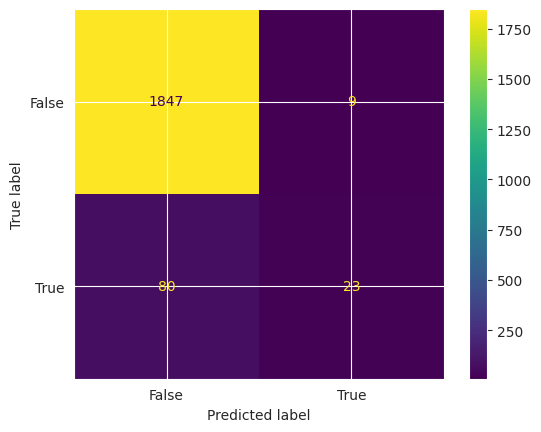

In [46]:
# Plot confusion matrix
plt.figure(figsize=(5, 3))
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

##Gradient Boosting Classifier

In [47]:
clfg = make_pipeline(SimpleImputer(),GradientBoostingClassifier())

 fine-tune Hyperparameters

In [58]:
paramsg = {
     "simpleimputer__strategy":["mean","median"],
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
}
paramsg

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

I'm trying much smaller numbers of n_estimators. This is because GradientBoostingClassifier is slower to train than the RandomForestClassifier

In [61]:
model_gb = GridSearchCV(clfg,param_grid=paramsg,cv=5,n_jobs=-1,verbose =1)

In [62]:
# Fit model to over-sampled training data
model_gb.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [63]:
#Extract the cross-validation results from model
results = pd.DataFrame(model_gb.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,11.972047,1.251500,0.015287,0.005510,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.915460,0.914449,0.904650,0.914420,0.914420,0.912680,0.004035,1
17,11.676346,1.100751,0.009520,0.001107,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.917481,0.901650,0.900270,0.904987,0.907682,0.906414,0.006108,2
14,9.762940,0.640305,0.009653,0.000163,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.903334,0.906029,0.902291,0.906334,0.901280,0.903854,0.002011,3
15,9.841898,0.413234,0.013614,0.006416,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.901987,0.891883,0.893868,0.897237,0.899596,0.896914,0.003678,4
12,7.920021,0.527810,0.013025,0.006467,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.894240,0.895925,0.892520,0.895553,0.889488,0.893545,0.002353,5
13,7.546136,0.784926,0.009644,0.000219,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.889862,0.886494,0.885445,0.890836,0.886456,0.887818,0.002123,6
10,9.666186,0.410182,0.012001,0.003570,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.867295,0.878747,0.871294,0.868598,0.863544,0.869896,0.005081,7
11,8.929615,0.670575,0.012832,0.005667,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.866285,0.864938,0.859501,0.870957,0.864218,0.865180,0.003683,8
8,7.469434,0.855743,0.009417,0.000198,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.858538,0.874368,0.865566,0.864892,0.858154,0.864304,0.005904,9
9,7.586340,0.650875,0.011444,0.004185,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.860896,0.860896,0.848383,0.863881,0.858154,0.858442,0.005346,10


In [64]:
# Extract best hyperparameters
model_gb.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

### Evaluate

In [65]:
acc_train = model_gb.score(X_train_over,y_train_over)
acc_test = model_gb.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9138
Validation Accuracy: 0.8964


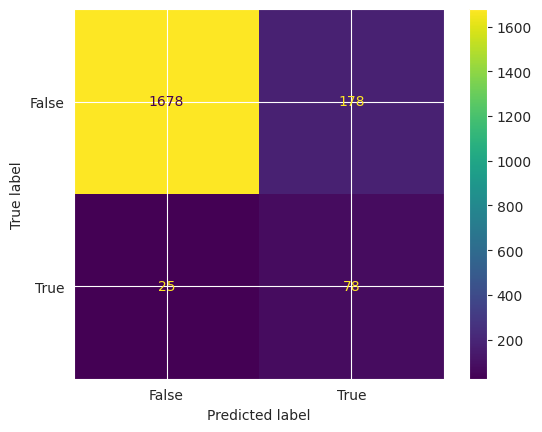

In [66]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_gb,X_test,y_test);

In [67]:
# Print classification report
print(classification_report(y_test,model_gb.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.90      0.94      1856
        True       0.30      0.76      0.43       103

    accuracy                           0.90      1959
   macro avg       0.65      0.83      0.69      1959
weighted avg       0.95      0.90      0.92      1959



I will save the random forest model because it outperforms gradient boosting and is much faster



#Communicate

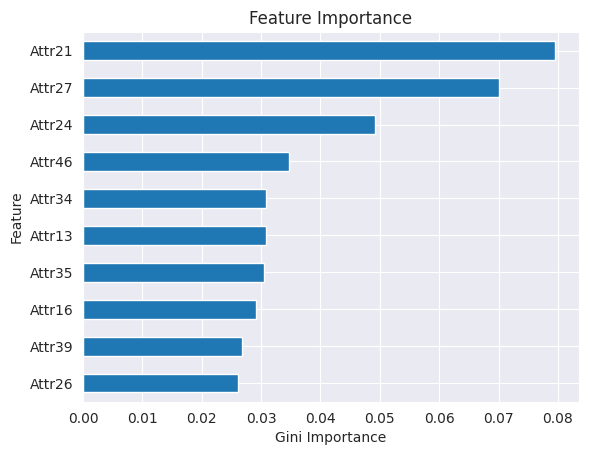

In [69]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index= features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [68]:
# Save model
with open("model-5-4.pkl","wb") as f:
    pickle.dump(model,f)